# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv('/datasets/real_estate_data_us.csv' ,sep ='\t')   
#data.info()
data.describe()
#data.shape
#data.sample

#data.head(10)

#data.head()
#data.tail()

#data['locality_name'].unique()



,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


### Step 2. Data preprocessing

In [2]:
#we need to take a look at missing values,and see how many mv in percent for every column
#date_posted          23699 non-null object - so there is no missing values at all
#days_listed          20518 non-null float64 -  (of 23699): 23699-20518=3,181/23699 *100= 13% percent dont touch!!!
#last_price           23699 non-null float64 -  no missing values
#bedrooms             23699 non-null int64  - no missing values
#kitchen_area         21421 non-null float64 - about 9% will keep it like this
#living_area          21796 non-null float64 - less then 9 % keep it as it is
#total_area           23699 non-null float64 - no missing values
#balconies            12180 non-null float64 - about 48 % Nan fill with 0


#ceiling_height       14504 non-null float64- about 38 % fill with median?
#floors_total         23613 non-null float64 - not important value
#floor                23699 non-null int64 - no mv
#total_images         23699 non-null int64 - no mv
#bike_parking         2775 non-null object - about 88% Nan fill with 0
#is_studio            23699 non-null bool - no mv
#is_open_plan         23699 non-null bool- no mv
#locality_name        23650 non-null object - very low level not important
#airport_dist         18157 non-null float64 - 23%  dont want to touch since can affect our conclusions
#city_center_dist     18180 non-null float64  - about 23% dont want to touch since can affect our conclusions
#park_dist            8079 non-null float64 - 65 % these columns are not to much important
#parks_within_3000    18181 non-null float64 - about 23%  not important
#pond_dist            9110 non-null float64 - around 64 % not ipmortant
#ponds_within_3000    18181 non-null float64 - 23% not important

#so we have to fill the missing values in following columns: balconies, ceiling_heghts,
#bike_parking, airport_dist, city_center_dist,park_dist,parks_within_3000, pond_dist,ponds_within_3000

#balconies missing values will fill with zero
#0 in 'balconies':
data['balconies'].isnull()
#we will replace NaN with zero
data['balconies'].fillna(0, inplace=True)
#print(data['balconies'].head(25))
data.head(10)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.00,51.00,108.00,0.0,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.00,18.60,40.40,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.30,34.30,56.00,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.00,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.00,32.00,100.00,0.0,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0
5,2018-09-10T00:00:00,55.0,57800.0,1,9.10,14.40,30.40,0.0,NaN,12.0,...,NaN,False,False,Yanino-1 village,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-02T00:00:00,155.0,74000.0,1,14.40,10.60,37.30,1.0,NaN,26.0,...,NaN,False,False,Pargolovo village,52996.0,19143.0,NaN,0.0,NaN,0.0
7,2019-04-18T00:00:00,NaN,158300.0,2,18.90,NaN,71.60,2.0,NaN,24.0,...,NaN,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
8,2018-05-23T00:00:00,189.0,58000.0,1,8.81,15.43,33.16,0.0,NaN,27.0,...,NaN,False,False,Murino village,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-02-26T00:00:00,289.0,108000.0,3,6.50,43.60,61.00,2.0,2.50,9.0,...,NaN,False,False,Saint Petersburg,50898.0,15008.0,NaN,0.0,NaN,0.0


In [3]:
#celeing_height now, filled missing with mean:
print(data['ceiling_height'].head(5))
print(data['ceiling_height'].fillna(data['ceiling_height'].median()))
#days listed gonna fill the missing with median
#print(data['days_listed'].fillna(data['days_listed'].median())

#data['balconies']=data['balconies'].fillna(0)
#print(data['balconies'].head(25))

0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
Name: ceiling_height, dtype: float64
0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64


#airport_dist have around 23% of missing values but since this can affects our final conclusions we will leave it
#city_center_dist gonna leave as it is,for the same reason these is the data that we need in pure form


#so I decided to leave these two columns as it is, just transformed meters to km.

In [6]:
#here we want to get rid of extremly high values for ceiling 
#(those are the heights ok for feed mills but thats not real estate that we are dealing with...,
# so by cuting them to median we will try to get rid of abnormal values in this column...
data['ceiling_height'].describe()

data['ceiling_height']=pd.np.where(data['ceiling_height'] >5 ,2.77 , data['ceiling_height'])
print(data['ceiling_height'].head())
data['ceiling_height'].describe() #to check what we did, its ok there is no celeing more than 5m


0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
Name: ceiling_height, dtype: float64


count    14504.000000
mean         2.725258
std          0.272242
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

In [7]:
#we are going to change time format in 'date_posted' column...
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%dT%H:%M:%S')
print(data['date_posted'].head())
#that looks neat

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: date_posted, dtype: datetime64[ns]


In [8]:
#now column 'locality_name' want to get rid of Upper case letters...
data['locality_name']=data['locality_name'].str.lower()
print(data['locality_name'].head(25))

0      saint petersburg
1      shushary village
2      saint petersburg
3      saint petersburg
4      saint petersburg
5      yanino-1 village
6     pargolovo village
7      saint petersburg
8        murino village
9      saint petersburg
10     saint petersburg
11            lomonosov
12            sertolovo
13             petergof
14              pushkin
15     saint petersburg
16     saint petersburg
17     saint petersburg
18     saint petersburg
19     saint petersburg
20    pargolovo village
21     saint petersburg
22      kudrovo village
23     saint petersburg
24     saint petersburg
Name: locality_name, dtype: object


In [9]:
 def check_data(data):   
     have_nan =[]
     for col in data.columns:
         if data[col].isna().sum() > 0:
             have_nan.append([col,round(data[col].isna().sum() / len(data),4), data[col].isna().sum()])      
    
     print('Missing values in',len(have_nan), 'col')

     have_nan = pd.DataFrame(have_nan)
     have_nan.columns = ['Field','%','Total_count']
     have_nan.sort_values('%', ascending = False, inplace = True)

     print('---------------------')
     print(have_nan)

 check_data(data)

Missing values in 13 col
---------------------
                Field       %  Total_count
5        bike_parking  0.8829        20924
9           park_dist  0.6591        15620
11          pond_dist  0.6156        14589
3      ceiling_height  0.3880         9195
7        airport_dist  0.2338         5542
8    city_center_dist  0.2329         5519
10  parks_within_3000  0.2328         5518
12  ponds_within_3000  0.2328         5518
0         days_listed  0.1342         3181
1        kitchen_area  0.0961         2278
2         living_area  0.0803         1903
4        floors_total  0.0036           86
6       locality_name  0.0021           49


In [10]:
#ok bike parking is the first we gonna fix, its a boolian values so we gonna fill NaN with False:
#data['bike_parking'].head(5)
data['bike_parking'].fillna(False)
print(data['bike_parking'].head(5))
print(data['bike_parking'].value_counts())

#park distance and pond distance totaly irelevant not gonna do nothing, the sam e with parks in 3000 and
#ponds in 3000

data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].value_counts())

#days_listed dont want to tuch since this is important column
#kitchen_area and living_area gonna fill with ratios that we came up with
#floors total and locality_name very low percent of missing values will ignore these

ratio_kitchen = data['kitchen_area']/ data['total_area'].median()

data['kitchen_area'] = data['kitchen_area'].fillna(value= data['total_area']*ratio_kitchen)

ratio_living_area=data['living_area']/data['total_area'].median()

data['living_area']=data['living_area'].fillna(value= data['total_area']*ratio_living_area)

#thats should be all regarding missing values

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: bike_parking, dtype: object
False    2725
True       50
Name: bike_parking, dtype: int64
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
3.59       1
4.80       1
4.90       1
3.44       1
3.39       1
Name: ceiling_height, Length: 164, dtype: int64


### Step 3. Make calculations and add them to the table

In [11]:
#adding a column 'price_per_square_meter'
data['price_per_square_meter']=data['last_price']/data['total_area']
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_square_meter
0,2019-03-07,NaN,260000.0,3,25.0,51.0,108.0,0.0,2.70,16.0,...,False,False,saint petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0,2407.407407
1,2018-12-04,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,False,False,shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0,1658.415842
2,2015-08-20,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,False,False,saint petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0,1855.714286
3,2015-07-24,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,False,False,saint petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0,8163.522013
4,2018-06-19,121.0,200000.0,2,41.0,32.0,100.0,0.0,3.03,14.0,...,False,False,saint petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0,2000.000000


In [12]:
#floor first/last/other
 
def find_floor(floor, total_floor):
    if floor == 1:
        return 'first'
    elif floor == total_floor:
        return 'last'
    else:
         return 'other'

data['floor_level'] = data.apply(lambda x: find_floor(x['floor'], x['floors_total']), axis=1) 
print(data.head())



  date_posted  days_listed  last_price  bedrooms  kitchen_area  living_area  \
0  2019-03-07          NaN    260000.0         3          25.0         51.0   
1  2018-12-04         81.0     67000.0         1          11.0         18.6   
2  2015-08-20        558.0    103920.0         2           8.3         34.3   
3  2015-07-24        424.0   1298000.0         3           NaN          NaN   
4  2018-06-19        121.0    200000.0         2          41.0         32.0   

   total_area  balconies  ceiling_height  floors_total  ...  is_open_plan  \
0       108.0        0.0            2.70          16.0  ...         False   
1        40.4        2.0             NaN          11.0  ...         False   
2        56.0        0.0             NaN           5.0  ...         False   
3       159.0        0.0             NaN          14.0  ...         False   
4       100.0        0.0            3.03          14.0  ...         False   

      locality_name airport_dist  city_center_dist  park_dist 

In [1]:
data['floor_level'].value_counts()

NameError: name 'data' is not defined

In [14]:
#the ratio between the living space and the total area, as well as between the kitchen space and the total area.
data['living_total_ratio']=data['living_area']/data['total_area']
data['kitchen_total_ratio']=data['kitchen_area']/data['total_area']
print(data.head())

  date_posted  days_listed  last_price  bedrooms  kitchen_area  living_area  \
0  2019-03-07          NaN    260000.0         3          25.0         51.0   
1  2018-12-04         81.0     67000.0         1          11.0         18.6   
2  2015-08-20        558.0    103920.0         2           8.3         34.3   
3  2015-07-24        424.0   1298000.0         3           NaN          NaN   
4  2018-06-19        121.0    200000.0         2          41.0         32.0   

   total_area  balconies  ceiling_height  floors_total  ...  airport_dist  \
0       108.0        0.0            2.70          16.0  ...       18863.0   
1        40.4        2.0             NaN          11.0  ...       12817.0   
2        56.0        0.0             NaN           5.0  ...       21741.0   
3       159.0        0.0             NaN          14.0  ...       28098.0   
4       100.0        0.0            3.03          14.0  ...       31856.0   

   city_center_dist park_dist  parks_within_3000  pond_dist po

In [15]:
#making new separate columns for days, monhts and years...
data['year'] = data['date_posted'].dt.year

data['month'] = data['date_posted'].dt.month

data['day'] = data['date_posted'].dt.day
print(data.head())


  date_posted  days_listed  last_price  bedrooms  kitchen_area  living_area  \
0  2019-03-07          NaN    260000.0         3          25.0         51.0   
1  2018-12-04         81.0     67000.0         1          11.0         18.6   
2  2015-08-20        558.0    103920.0         2           8.3         34.3   
3  2015-07-24        424.0   1298000.0         3           NaN          NaN   
4  2018-06-19        121.0    200000.0         2          41.0         32.0   

   total_area  balconies  ceiling_height  floors_total  ...  \
0       108.0        0.0            2.70          16.0  ...   
1        40.4        2.0             NaN          11.0  ...   
2        56.0        0.0             NaN           5.0  ...   
3       159.0        0.0             NaN          14.0  ...   
4       100.0        0.0            3.03          14.0  ...   

   parks_within_3000  pond_dist ponds_within_3000  price_per_square_meter  \
0                1.0      755.0               2.0             2407.40

### Step 4. Conduct exploratory data analysis and follow the instructions below:

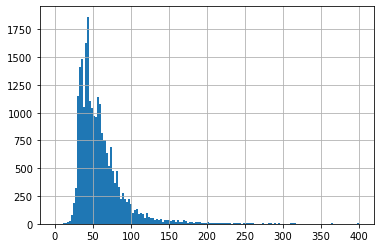

In [16]:
#Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height.
#Plot a histogram for each parameter.

import matplotlib.pyplot as plt

data['total_area'].hist(bins=150,range=(0,400))

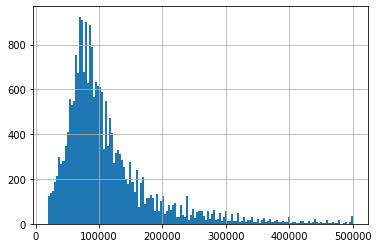

In [17]:
#same thing for last_price...
data['last_price'].hist(bins=150,range=(20000,500000))


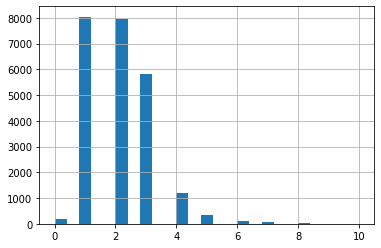

In [18]:
#same for the bedrooms...
data['bedrooms'].hist(bins=25,range=(0,10))

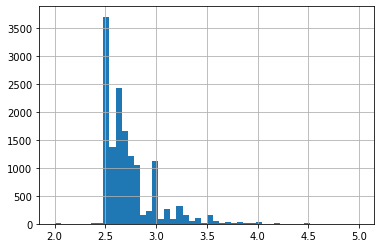

In [19]:
#ceiling heights as well...
data['ceiling_height'].hist(bins=50, range=(2,5))

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_listed, dtype: float64


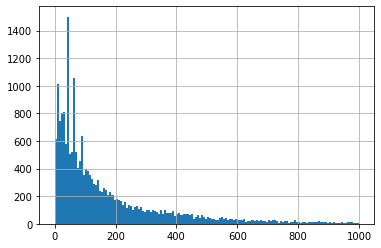

In [20]:
# "Examine the time it's taken to sell the apartment 
print(data['days_listed'].describe())

data['days_listed'].hist(bins=150, range=(0,1000))

#data['days_listed'].boxplot()
#plt.ylim(-100, 1000)
#as we can see from a table bellow mean time for selling appartment is aorund 180 days, while min is 1 and max is 1580

In [21]:

# data['days_listed'].hist(bins=100, range=(30,100))

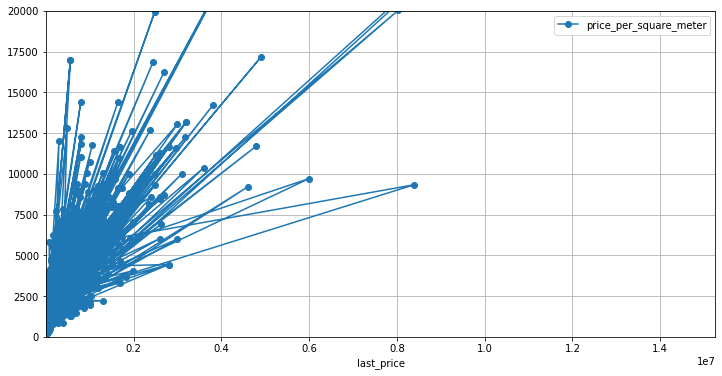

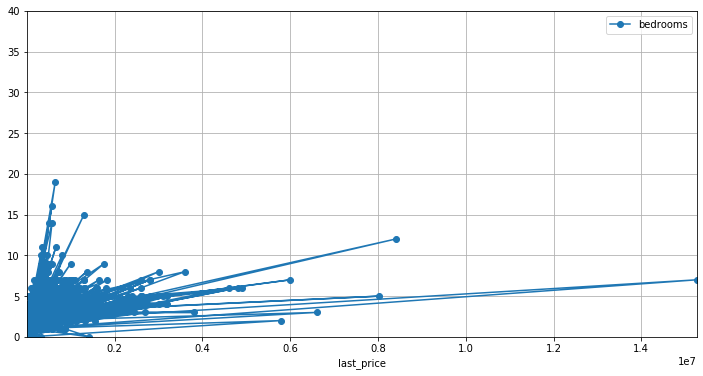

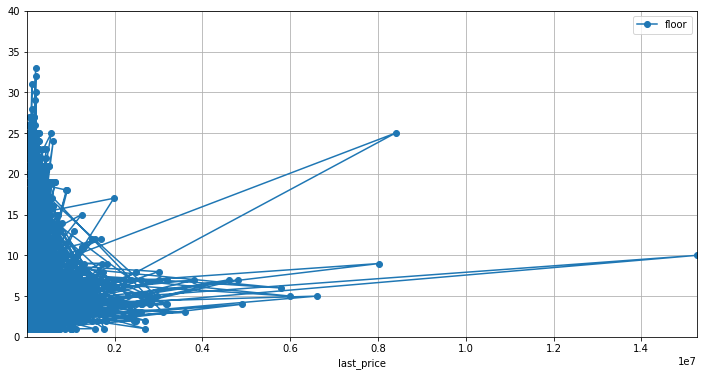

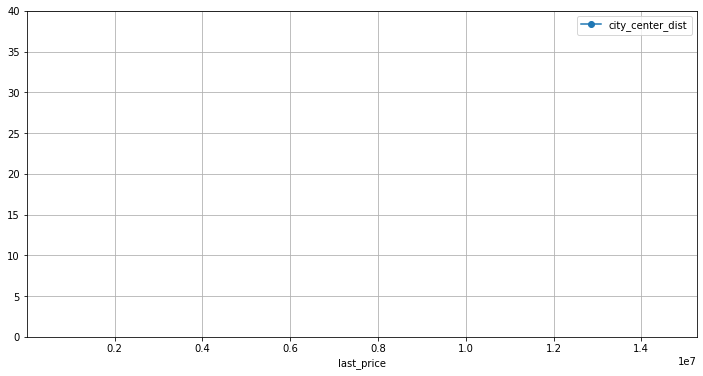

In [22]:
#Remove rare and outlying values and describe the specific details you've discovered
#Which factors have had the biggest influence on an apartment’s value? 
#Examine whether the value depends on price per meter, number of rooms,
#floor (top or bottom), or the proximity to the downtown area.



data.plot(x='last_price', y='price_per_square_meter', style='o-', ylim=(0,20000), grid=True, figsize=(12,6))
data.plot(x='last_price', y='bedrooms', style='o-', ylim=(0,40), grid=True, figsize=(12,6))
data.plot(x='last_price', y='floor', style='o-', ylim=(0,40), grid=True, figsize=(12,6))
data.plot(x='last_price', y='city_center_dist', style='o-', ylim=(0,40), grid=True, figsize=(12,6))


#Ok from here to the end I cant manage to move at all, please need your help on following:
*  Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the city center area. Ok this I cant see on graphs but I know for sure that LOCATION is No1 factor
*Also check whether the publication date has any effect on the price: specifically, day of the week, month, and year.
I dont have any idea how to put this task into the code
and everything from here is so confusing and the worst thing if I want to find it in the lessons, cant manage to do that...a

              kitchen_area  living_area
kitchen_area      1.000000     0.428674
living_area       0.428674     1.000000
                  last_price  city_center_dist
last_price          1.000000         -0.206747
city_center_dist   -0.206747          1.000000
                        last_price  price_per_square_meter
last_price                1.000000                0.736499
price_per_square_meter    0.736499                1.000000


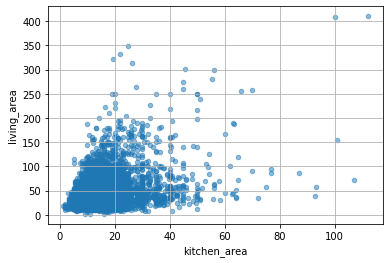

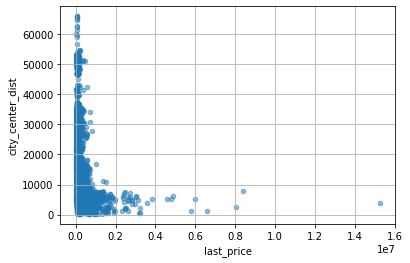

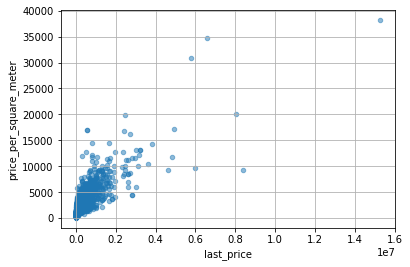

In [23]:
# Lets look at charts:
data.plot(x='kitchen_area', y='living_area',  kind = 'scatter',alpha=0.5, grid=True)
print(data[['kitchen_area','living_area']].corr())
#according to the corr function there is relatively low corelation betweentchen and living area

data.plot(x='last_price', y='city_center_dist', kind = 'scatter',alpha=0.5, grid=True)
print(data[['last_price','city_center_dist']].corr())
#according to the resluts there is a low negative corelation between city center and price of the real estate

data.plot(x='last_price', y='price_per_square_meter', kind = 'scatter',alpha=0.5, grid=True)
print(data[['last_price','price_per_square_meter']].corr())
#according to the relusts there is a high positive corelation between price and price per square meters

#after all the checks we can said that there is a highest corelation between price and price per square meters



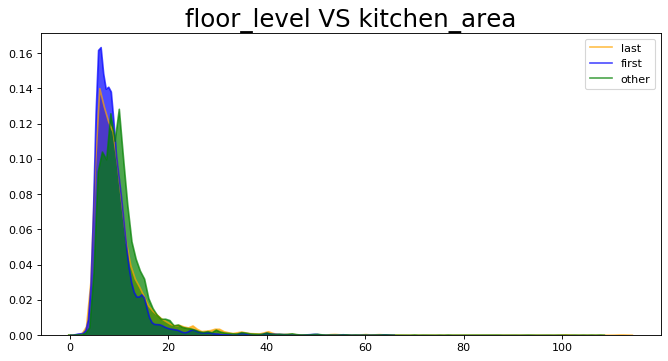

In [24]:
# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(data.loc[data['floor_level']=='last','kitchen_area'], shade=True, color="orange", label="last", alpha=.7)
sns.kdeplot(data.loc[data['floor_level']=='first','kitchen_area'], shade=True, color="blue", label="first", alpha=.7)
sns.kdeplot(data.loc[data['floor_level']=='other','kitchen_area'], shade=True, color="green", label="other", alpha=.7)

# Decoration
plt.title('floor_level VS kitchen_area', fontsize=22)
plt.legend()
plt.show()


In [25]:
# Here you can see a strong positive correlation = 0,939 between living_area and total_area
data[['living_area','total_area']].corr()
#data[['last_price','price_per_square_meter']].corr()



,living_area,total_area
living_area,1.000000,0.939537
total_area,0.939537,1.000000


In [26]:
#Select the 10 places with the largest number of ads and then calculate the average price per square 
#meter in these localities...
top10 = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.tolist()
data.query('locality_name in @top10').groupby('locality_name')['price_per_square_meter'].mean().sort_values(ascending = False)

locality_name
saint petersburg     2296.980173
pushkin              2062.516436
kudrovo village      1849.470888
pargolovo village    1803.518265
murino village       1713.635239
shushary village     1573.547285
kolpino              1508.491516
gatchina             1374.922923
vsevolozhsk          1373.089507
vyborg               1162.838183
Name: price_per_square_meter, dtype: float64

In [27]:
#Select the 10 places with the largest number of ads and then calculate the average price per square 
#meter in these localities...
top10 = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.tolist()
data.query('locality_name in @top10').groupby('locality_name')['price_per_square_meter'].mean().sort_values(ascending = False)

locality_name
saint petersburg     2296.980173
pushkin              2062.516436
kudrovo village      1849.470888
pargolovo village    1803.518265
murino village       1713.635239
shushary village     1573.547285
kolpino              1508.491516
gatchina             1374.922923
vsevolozhsk          1373.089507
vyborg               1162.838183
Name: price_per_square_meter, dtype: float64

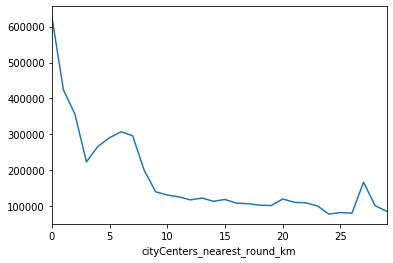

In [28]:
#Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. 
#Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered 
#to be in the city center. In order to do that, create a column with the distance to the city center in km 
#and round to the nearest whole number. Next, calculate the average price for each kilometer and plot 
#a graph to display how prices are affected by the distance to the city center.
#Find a place on the graph where it shifts significantly. That's the city center border.
#create a column with the distance to the city center in km and round to the nearest whole number. 

stpetersburg_kilometer=data[data['locality_name']=='saint petersburg'].copy()
stpetersburg_kilometer['cityCenters_nearest_round_km'] = 0
stpetersburg_kilometer.loc[:,'cityCenters_nearest_round_km'] = round(stpetersburg_kilometer['city_center_dist'] / 1000,0)
stpetersburg_kilometer.groupby('cityCenters_nearest_round_km')['last_price'].mean().plot()
#dont now how to fix this mess

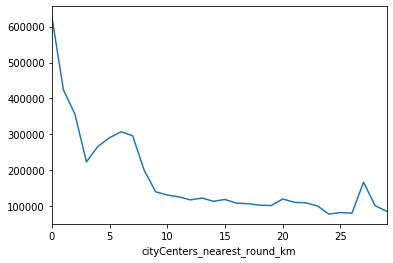

In [29]:
stpetersburg_kilometer=data[data['locality_name']=='saint petersburg'].copy()
stpetersburg_kilometer['cityCenters_nearest_round_km'] = 0
stpetersburg_kilometer.loc[:,'cityCenters_nearest_round_km'] = round(stpetersburg_kilometer['city_center_dist'] / 1000,0)
stpetersburg_kilometer.groupby('cityCenters_nearest_round_km')['last_price'].mean().plot()

In [30]:
#according to the graph results we can say that somwhere around between 7-8 kilometers there is a turning point in terms of 
#prices of the rela estat.Also a sudden drop arround 4th kilometer might be caused by the river Neva.

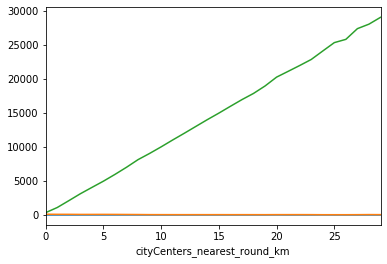

In [31]:
#Select a segment of apartments in the downtown. Analyze this area and examine the following parameters:
#square area, price, number of rooms, ceiling height. Also identify the factors 
#that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). 
#Draw your conclusions. Are they different from the overall conclusions about the entire city?"
#data[['city_center_dist','total_area']].corr()
stpetersburg_kilometer.groupby('cityCenters_nearest_round_km')['floor'].mean().plot()
#most of the center buildings up to 5 floors, higher bulidings locatedin the 17-25 km area and then after that sudden fall 
#might be caused by entering country side and villages areas...just a guess
stpetersburg_kilometer.groupby('cityCenters_nearest_round_km')['total_area'].mean().plot()
stpetersburg_kilometer.groupby('cityCenters_nearest_round_km')['city_center_dist'].mean().plot()




<div class="alert alert-block alert-warning">
The sharp drop in the cost in the area of 3 km is probably because the Neva river is located within this radius. I still tend to believe that the radius is around 8-9 km.</div>


In [42]:
# Select a segment of apartments in the downtown. Analyze this area and examine the following parameters:
#square area, price, number of rooms, ceiling height. Also identify the factors 
#that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date).
center_data_price = data[['city_center_dist', 'last_price', 'total_area', 'bedrooms', 'floor']]
# center_data_price = center_data_price.query('city_center_dist <= 8')
center_data_price = center_data_price.query('city_center_dist <= 8000')
center_data_price.corr()

#and now when I want to make corellation it give me some kind of error


,city_center_dist,last_price,total_area,bedrooms,floor
city_center_dist,1.000000,-0.048144,-0.105192,-0.176570,0.249516
last_price,-0.048144,1.000000,0.636406,0.333047,0.126028
total_area,-0.105192,0.636406,1.000000,0.736683,0.104461
bedrooms,-0.176570,0.333047,0.736683,1.000000,-0.038684
floor,0.249516,0.126028,0.104461,-0.038684,1.000000


In [ ]:
#Ok since I cant manage to draw graphs for the last task I will give overal conclusons for the entire city
#The main factor that affect the real estate value is location, and proximity to the city center,besides that
#price_per_square meter also affect price of a real estate.There is a certain depression in prices arround 5 kilometers
#from city center caused by river Neva.There are also some missing info on real estate condition ( good conditon, new, renovated)
#and those are also significant factors that affects price per meter and overal price of a real estate.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [ ]  files explored (first rows printed, info() method)
- [ ]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: the price per square meter
- [ ]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [ ]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [ ]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [ ]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [ ]  histograms for each parameter created
- [ ]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [ ]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [ ]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [ ]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [ ]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn